# 군집분석 (2) : hierarchical
* 계보적 군집분석 (Hierarchical)
* 군집 갯수를 사전에 정하지 않음

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [8]:
# 데이터 준비
# 예를 들어, d1이라는 DataFrame을 가지고 있다고 가정
data = {
    'country': ['Country1', 'Country2', 'Country3', 'Country4', 'Country5'],
    'feature1': [12, 34, 67, 10, 30],
    'feature2': [10, 10, 10, 20, 40],
    'feature3': [70, 15, 30, 25, 15],
    'feature4': [20, 30, 40, 50, 60]
}
d1 = pd.DataFrame(data)

In [9]:
# 데이터 표준화
features = d1.drop(columns='country')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# 계층적 군집분석
distance_matrix = np.sqrt(((scaled_features[:, np.newaxis] - scaled_features)**2).sum(axis=2))
linkage_matrix = linkage(distance_matrix, method='ward')

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_7309/1833356183.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


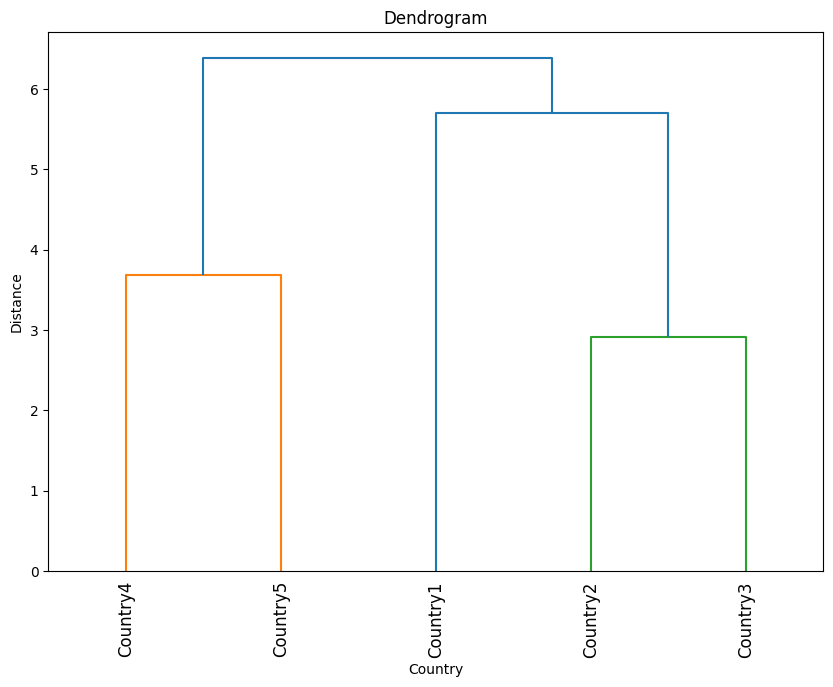

In [11]:
# 시각화: 덴드로그램
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=d1['country'].values, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

In [16]:
# 클러스터링: K=5로 군집 수 지정
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

# 결과를 원본 데이터와 결합
d1['cluster'] = clusters

# 군집별 평균 계산
# 군집별 평균을 계산하기 전에 데이터가 숫자형인지 확인하고 변환합니다
numeric_data = d1.drop(columns='country')
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')  # 모든 열을 숫자형으로 변환
cluster_means = numeric_data.groupby(d1['cluster']).mean()

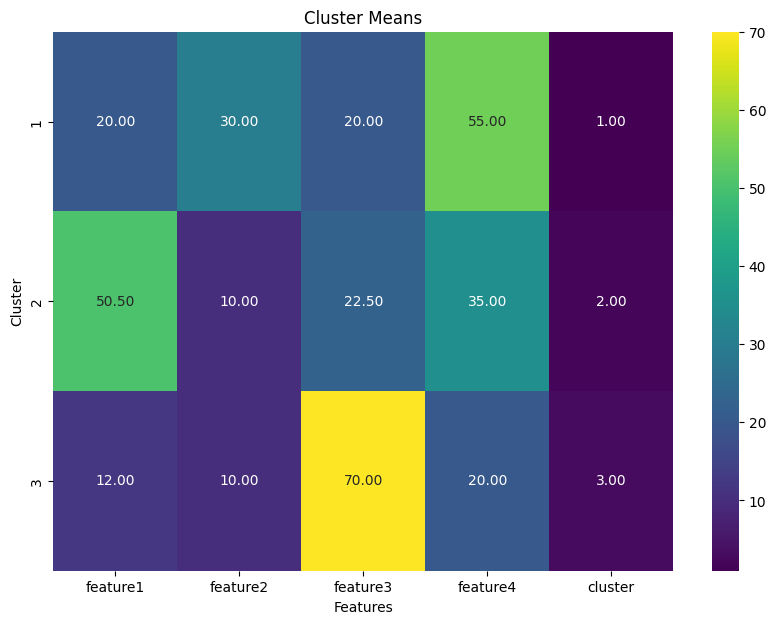

In [17]:
# 군집별 평균 시각화
plt.figure(figsize=(10, 7))
colors = ['white', 'yellow', 'green', 'cyan', 'black', 'grey']
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Means')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

In [ ]:
# 군집별 데이터 개수
cluster_counts = d1['cluster'].value_counts()
print(cluster_counts)

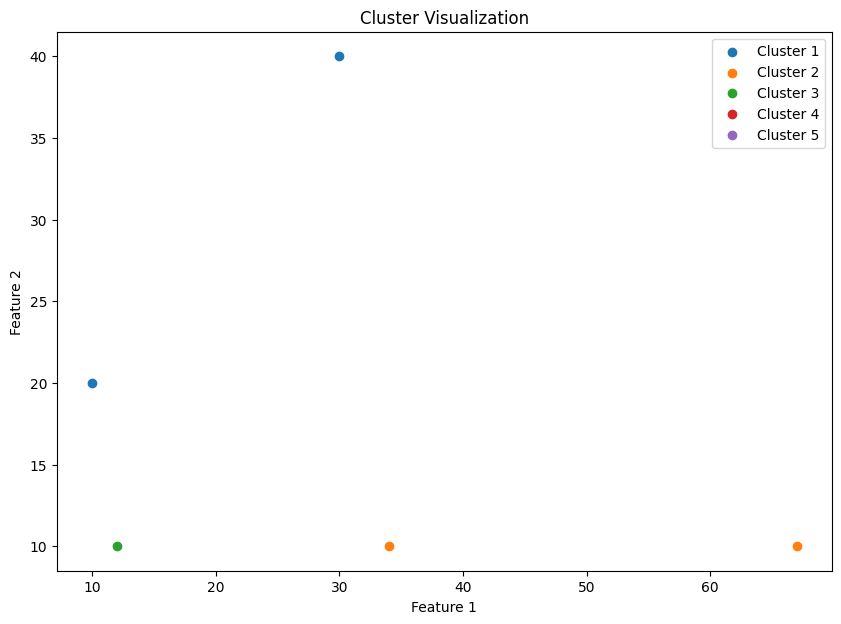

In [18]:
# 군집별 데이터 시각화
plt.figure(figsize=(10, 7))
for i in range(1, 6):
    cluster_data = d1[d1['cluster'] == i]
    plt.scatter(cluster_data['feature1'], cluster_data['feature2'], label=f'Cluster {i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()